# **Capstone Project - The Battle of the Neighborhoods** (Week2)

# Table of Contents
* [Introduction](#introduction)
* [Data Collection](#data_collection)
    * [Vancouver Geospatial Data](#vancouver_geospatial_data)
    * [Edmonton Geospatial Data](#edmonton_geospatial_data)
* [Analysis and Discussion](#analysis_and_discussion)
    * [Vancouver Neighborhoods](#vancouver_neighborhoods)
    * [Edmonton Neighborhoods](#edmonton_neighborhoods)
    * [Vancouver Temperature](#vancouver_temperature)
    * [Edmontonr Temperature](#edmonton_temperature)
* [Conclusion](#conclusion)

# Introduction <a name="introduction"></a>

In this project we will compare two cities in west Canada: Vancouver and Edmonton, to find out which city/neighborhoods is optimum for the operation of seasonal food truck services and what is the best time period for the operation. Therefore, two key parameters are considered here: **location** and **time**. 

For location selection, the ideal places to operate a food truck is large open space with potentially high population density, such as parks or beaches during summertime. 

For the selection of operation time, temperature is one of the most important parameters. Generally, people are likely to gather at parks or beaches under warm weather and stay indoor if it is extremely hot or cold outside. Therefore, it is rational to start the business when the weather is warm enough and terminate before it gets too cold. 

Our data sources are listed as follows:

Temperature data:  
https://www.currentresults.com/Weather/Canada/British-Columbia/Places/vancouver-temperatures-by-month-average.php  
https://www.currentresults.com/Weather/Canada/Alberta/Places/edmonton-temperatures-by-month-average.php  

Postal code and neighborhoods:  
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V  
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T  

Coordinates of neighborhoods:  
http://www.geonames.org/postalcode-search.html?q=BC&country=CA  
https://www.geonames.org/postal-codes/CA/AB/alberta.html  

Location service:  
https://foursquare.com/  

In [1]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline 

# Data Collection <a name="data_collection"></a>

## Vancouver Geospatial Data <a name="vancouver_geospatial_data"></a>

#### Collecte Postal Code and Neighborhoods Information for the City of  Vancouver

pandas is used to read information from wiki page

In [2]:
vdfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V")
vdf = vdfs[0]
vdf.head()

,0,1,2,3,4,5,6,7,8
0,V1AKimberley,V2APenticton,V3ALangley Township(Langley City),V4ASurreySouthwest,V5ABurnaby(Government Road / Lake City / SFU /...,V6AVancouver(Strathcona / Chinatown / Downtown...,V7ARichmondSouth,V8APowell River,V9AVictoria(Vic West / Esquimalt)Canadian Forc...
1,V1BVernonEast,V2BKamloopsNorthwest,V3BPort CoquitlamCentral,V4BWhite Rock,V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott),V6BVancouver(NE Downtown / Gastown / Harbour C...,V7BRichmond(Sea Island / YVR),V8BSquamish,V9BVictoria(West Highlands / North Langford / ...
2,V1CCranbrook,V2CKamloopsCentral and Southeast,V3CPort CoquitlamSouth,V4CDeltaNortheast,V5CBurnaby(Burnaby Heights / Willingdon Height...,V6CVancouver(Waterfront / Coal Harbour / Canad...,V7CRichmondNorthwest,V8CKitimat,V9CVictoria(Colwood / South Langford / Metchosin)
3,V1ESalmon Arm,V2EKamloopsSouth and West,V3ECoquitlamNorth,V4EDeltaEast,V5EBurnaby(Lakeview-Mayfield / Richmond Park /...,V6EVancouver(SE West End / Davie Village),V7ERichmondSouthwest,V8EWhistler,V9EVictoria(East Highlands / NW Saanich)
4,V1GDawson Creek,V2GWilliams Lake,V3GAbbotsfordEast,V4GDeltaEast Central,V5GBurnaby(Cascade-Schou / Douglas-Gilpin),V6GVancouver(NW West End / Stanley Park),V7GNorth Vancouver (district municipality)Oute...,V8GTerrace,V9GLadysmith


### Data Wrangling

It can be seen from the results that each block contains the information of postal code (first three letter/number), name of the city and name of neiborghhoods. The next step is to clean up the data.

First, lets pick the blocks with the keyword "Vancouver" in it and convert the results into a dictionary.

In [3]:
testlist = []
for i in range(vdf.shape[0]):
    for j in range(vdf.shape[1]):
        if 'Vancouver' in vdf.loc[i,j]:
            testlist.append(vdf.loc[i,j])
vdict = {key: i for i, key in enumerate(testlist)}
vdict

{'V6AVancouver(Strathcona / Chinatown / Downtown Eastside)': 0,
 'V6BVancouver(NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown)': 1,
 'V6CVancouver(Waterfront / Coal Harbour / Canada Place)': 2,
 'V6EVancouver(SE West End / Davie Village)': 3,
 'V6GVancouver(NW West End / Stanley Park)': 4,
 'V7GNorth Vancouver (district municipality)Outer East': 5,
 'V6HVancouver(West Fairview / Granville Island / NE Shaughnessy)': 6,
 'V7HNorth Vancouver (district municipality)Inner East': 7,
 'V6JVancouver(NW Shaughnessy / East Kitsilano / Quilchena)': 8,
 'V7JNorth Vancouver (district municipality)East Central': 9,
 'V5KVancouver(North Hastings-Sunrise)': 10,
 'V6KVancouver(Central Kitsilano / Greektown)': 11,
 'V7KNorth Vancouver (district municipality)North Central': 12,
 'V5LVancouver(North Grandview-Woodland)': 13,
 'V6LVancouver(NW Arbutus Ridge / NE Dunbar-Southlands)': 14,
 'V7LNorth Vancouver (city)South Central': 15,
 'V5MVancouver(South Hastings-

Next, we convert this dictionary into a pandas dataframe

In [4]:
vdf = pd.DataFrame.from_dict(vdict, orient='index').reset_index()
vdf = vdf.drop(columns = 0, axis = 1)
vdf.head()

,index
0,V6AVancouver(Strathcona / Chinatown / Downtown...
1,V6BVancouver(NE Downtown / Gastown / Harbour C...
2,V6CVancouver(Waterfront / Coal Harbour / Canad...
3,V6EVancouver(SE West End / Davie Village)
4,V6GVancouver(NW West End / Stanley Park)


As all the information are contained in one block, we will parse the data according to their structure:  
First three letter/number are parsed as postal code;  
Name of the city/borough appears after the postal code and before "(";  
Name of the neighborhoods are in the "()"  

In [5]:
vdf['Postal Code'] = vdf['index'].astype(str).str[0:3]
vdf['Borough'] = vdf['index'].astype(str).str[3:].str.extract(r'(.+?(?=\())')
vdf['Neighborhood'] = vdf['index'].astype(str).str[3:].str.extract(r'\((.*)\)')
vdf.head(40)

,index,Postal Code,Borough,Neighborhood
0,V6AVancouver(Strathcona / Chinatown / Downtown...,V6A,Vancouver,Strathcona / Chinatown / Downtown Eastside
1,V6BVancouver(NE Downtown / Gastown / Harbour C...,V6B,Vancouver,NE Downtown / Gastown / Harbour Centre / Inter...
2,V6CVancouver(Waterfront / Coal Harbour / Canad...,V6C,Vancouver,Waterfront / Coal Harbour / Canada Place
3,V6EVancouver(SE West End / Davie Village),V6E,Vancouver,SE West End / Davie Village
4,V6GVancouver(NW West End / Stanley Park),V6G,Vancouver,NW West End / Stanley Park
5,V7GNorth Vancouver (district municipality)Oute...,V7G,North Vancouver,district municipality
6,V6HVancouver(West Fairview / Granville Island ...,V6H,Vancouver,West Fairview / Granville Island / NE Shaughnessy
7,V7HNorth Vancouver (district municipality)Inne...,V7H,North Vancouver,district municipality
8,V6JVancouver(NW Shaughnessy / East Kitsilano /...,V6J,Vancouver,NW Shaughnessy / East Kitsilano / Quilchena
9,V7JNorth Vancouver (district municipality)East...,V7J,North Vancouver,district municipality


It appears that by using 'Vancouver' as keyword, we also included North Vancouver and West Vancouver in our dataframe. Now let's remove them and only keep the information of Vancouver

In [6]:
vdf = vdf[vdf.Neighborhood != 'district municipality']
vdf = vdf[vdf.Neighborhood != 'city']
vdf = vdf.dropna()
vdf.reset_index(inplace = True)
vdf

,level_0,index,Postal Code,Borough,Neighborhood
0,0,V6AVancouver(Strathcona / Chinatown / Downtown...,V6A,Vancouver,Strathcona / Chinatown / Downtown Eastside
1,1,V6BVancouver(NE Downtown / Gastown / Harbour C...,V6B,Vancouver,NE Downtown / Gastown / Harbour Centre / Inter...
2,2,V6CVancouver(Waterfront / Coal Harbour / Canad...,V6C,Vancouver,Waterfront / Coal Harbour / Canada Place
3,3,V6EVancouver(SE West End / Davie Village),V6E,Vancouver,SE West End / Davie Village
4,4,V6GVancouver(NW West End / Stanley Park),V6G,Vancouver,NW West End / Stanley Park
5,6,V6HVancouver(West Fairview / Granville Island ...,V6H,Vancouver,West Fairview / Granville Island / NE Shaughnessy
6,8,V6JVancouver(NW Shaughnessy / East Kitsilano /...,V6J,Vancouver,NW Shaughnessy / East Kitsilano / Quilchena
7,10,V5KVancouver(North Hastings-Sunrise),V5K,Vancouver,North Hastings-Sunrise
8,11,V6KVancouver(Central Kitsilano / Greektown),V6K,Vancouver,Central Kitsilano / Greektown
9,13,V5LVancouver(North Grandview-Woodland),V5L,Vancouver,North Grandview-Woodland


Check how many neighborhoods are there in Vancouver

In [7]:
print (vdf.shape)

(31, 5)


### Collecte Postal Code and Coordinates of Neighborhoods for the City of  Vancouver

pandas is used to read information from web page that contains the name, postal code and coordinates of neighborhoods in vancouver

In [16]:
corvdf = pd.read_html("http://www.geonames.org/postalcode-search.html?q=BC&country=CA")
corvdf = corvdf[2]
corvdf.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Port Moody,V3H,Canada,British Columbia,NaN,NaN
1,NaN,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,2.0,Pitt Meadows,V3Y,Canada,British Columbia,NaN,NaN
3,NaN,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,3.0,White Rock,V4B,Canada,British Columbia,NaN,NaN


Replace the NaN vlaue with 0, and check the head

In [17]:
corvdf.fillna(value = 0, inplace=True)
corvdf.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Port Moody,V3H,Canada,British Columbia,0,0
1,0.0,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,2.0,Pitt Meadows,V3Y,Canada,British Columbia,0,0
3,0.0,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,3.0,White Rock,V4B,Canada,British Columbia,0,0


Also check the tail

In [18]:
corvdf.tail()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
380,191.0,Burnaby (Government Road / Lake City / SFU / B...,V5A,Canada,British Columbia,Burnaby,0
381,0.0,49.264/-122.937,49.264/-122.937,49.264/-122.937,49.264/-122.937,49.264/-122.937,49.264/-122.937
382,192.0,Dawson Creek,V1G,Canada,British Columbia,0,0
383,0.0,55.767/-120.236,55.767/-120.236,55.767/-120.236,55.767/-120.236,55.767/-120.236,55.767/-120.236
384,0.0,0,0,0,0,0,0


The last row has different format and no information. Therefore it will be dropped

In [20]:
corvdf = corvdf[0:384]

Now parse the coordinate data and place the **latitude** and **longitude** into column **'Admin2'** and **'Admin3'** respectively

In [21]:
for index, rows in corvdf.iterrows():
    if corvdf.loc[index, 'Admin2'] == 0 or corvdf.loc[index, 'Admin3'] == 0:
        corvdf.at[index, 'Admin2'] = float(re.search('(.+?(?=\/))', corvdf.loc[index + 1 , 'Admin2']).group())
        corvdf.at[index, 'Admin3'] = float(re.search('\/(.*)', corvdf.loc[index + 1 , 'Admin2']).group()[1:])
corvdf.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Port Moody,V3H,Canada,British Columbia,49.323,-122.863
1,0.0,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,2.0,Pitt Meadows,V3Y,Canada,British Columbia,49.221,-122.69
3,0.0,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,3.0,White Rock,V4B,Canada,British Columbia,49.026,-122.806


Drop the unwanted columns and rename the rest columns

In [22]:
corvdf.drop(columns = ['Unnamed: 0','Place','Country','Admin1'], axis=1, inplace=True)
corvdf.rename(columns={"Code": "Postal Code", "Admin2": "Latitude", "Admin3": "Longitude"}, inplace=True)
corvdf.reset_index()
corvdf.head()

,Postal Code,Latitude,Longitude
0,V3H,49.323,-122.863
1,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,V3Y,49.221,-122.69
3,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,V4B,49.026,-122.806


### Merge the Two Dataframe Based on Their Postal Codes

In [23]:
mergevdf = vdf.merge(corvdf, how='inner',left_on='Postal Code', right_on='Postal Code')
mergevdf.head()

,level_0,index,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,0,V6AVancouver(Strathcona / Chinatown / Downtown...,V6A,Vancouver,Strathcona / Chinatown / Downtown Eastside,49.278,-123.091
1,1,V6BVancouver(NE Downtown / Gastown / Harbour C...,V6B,Vancouver,NE Downtown / Gastown / Harbour Centre / Inter...,49.279,-123.114
2,2,V6CVancouver(Waterfront / Coal Harbour / Canad...,V6C,Vancouver,Waterfront / Coal Harbour / Canada Place,49.287,-123.116
3,3,V6EVancouver(SE West End / Davie Village),V6E,Vancouver,SE West End / Davie Village,49.283,-123.13
4,4,V6GVancouver(NW West End / Stanley Park),V6G,Vancouver,NW West End / Stanley Park,49.299,-123.141


Drop unwanted columns  
Change the data type from string to **float**  
Correct the coordinates of UBC

In [24]:
mergevdf.drop(columns = ['index', 'level_0'], axis=1, inplace=True)
mergevdf['Latitude'] = mergevdf['Latitude'].astype(float)
mergevdf['Longitude'] = mergevdf['Longitude'].astype(float)
mergevdf.at[22,'Latitude'] = 49.264
mergevdf.at[22,'Longitude'] = -123.2319
mergevdf.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,V6A,Vancouver,Strathcona / Chinatown / Downtown Eastside,49.278,-123.091
1,V6B,Vancouver,NE Downtown / Gastown / Harbour Centre / Inter...,49.279,-123.114
2,V6C,Vancouver,Waterfront / Coal Harbour / Canada Place,49.287,-123.116
3,V6E,Vancouver,SE West End / Davie Village,49.283,-123.130
4,V6G,Vancouver,NW West End / Stanley Park,49.299,-123.141


In [25]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Use geopy library to get the latitude and longitude values of Vancouver

In [26]:
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="van_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


### Create a map of Vancouver with neighborhoods superimposed on top.

In [27]:
# create map of Vancouver using latitude and longitude values
map_van = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(mergevdf['Latitude'], mergevdf['Longitude'], mergevdf['Borough'], mergevdf['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_van)  
    
map_van

## Edmonton Geospatial Data <a name="edmonton_geospatial_data"></a>

#### Repeat the Same Procedure for Edmonton

First collect the data and organize into a dataframe

In [39]:
# Read raw data of Edmonton from wiki page
edfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T")
edf = edfs[0]
edf.head()

,0,1,2,3,4,5,6,7,8
0,T1AMedicine HatCentral,T2ACalgary(Penbrooke Meadows / Marlborough),T3ACalgary(Dalhousie / Edgemont / Hamptons / H...,T4AAirdrieEast,T5AEdmonton(West Clareview / East Londonderry),T6AEdmonton(North Capilano),T7ADrayton Valley,T8ASherwood ParkWest,T9AWetaskiwin
1,T1BMedicine HatSouth,T2BCalgary(Forest Lawn / Dover / Erin Woods),T3BCalgary(Montgomery / Bowness / Silver Sprin...,T4BAirdrieWest,T5BEdmonton(East North Central / West Beverly),T6BEdmonton(SE Capilano / West Southeast Indus...,T7BNot assigned,T8BSherwood ParkOuter Southwest,T9BNot assigned
2,T1CMedicine HatNorth,T2CCalgary(Lynnwood Ridge / Ogden / Foothills ...,T3CCalgary(Rosscarrock / Westgate / Wildwood /...,T4CCochrane,T5CEdmonton(Central Londonderry),T6CEdmonton(Central Bonnie Doon),T7CNot assigned,T8CSherwood ParkInner Southwest,T9CVegreville
3,T1ENot assigned,T2ECalgary(Bridgeland / Greenview / Zoo / YYC),T3ECalgary(Lakeview / Glendale / Killarney / G...,T4ERed Deer County,T5EEdmonton(West Londonderry / East Calder),T6EEdmonton(South Bonnie Doon / East University),T7EEdson,T8ESherwood ParkCentral (Ardrossan),T9ELeduc(Includes YEG)
4,T1GTaber,T2GCalgary(Inglewood / Burnsland / Chinatown /...,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...,T4GInnisfail,T5GEdmonton(North Central / Queen Mary Park / ...,T6GEdmonton(West University / Strathcona Place),T7GNot assigned,T8GSherwood Park/ Ardrossan East,T9GDevon


In [40]:
# Convert the data into a list then into dictionary
Edtestlist = []
for i in range(edf.shape[0]):
    for j in range(edf.shape[1]):
        if 'Edmonton' in edf.loc[i,j]:
            Edtestlist.append(edf.loc[i,j])

edict = {key: i for i, key in enumerate(Edtestlist)}

# Convert the data into dataframe
edf = pd.DataFrame.from_dict(edict, orient='index').reset_index()
edf = edf.drop(columns = 0, axis = 1)

# Construct new columns of Postal Code, Borough and Neighborhood by parsing the data
edf['Postal Code'] = edf['index'].astype(str).str[0:3]
edf['Borough'] = edf['index'].astype(str).str[3:].str.extract(r'(.+?(?=\())')
edf['Neighborhood'] = edf['index'].astype(str).str[3:].str.extract(r'\((.*)\)')

# Correct the format
edf.at[19, 'Borough'] = 'Edmonton'
edf.at[19, 'Neighborhood'] = 'EdmontonSouthwest'
edf.dropna(axis = 0, inplace = True)
edf.reset_index(inplace = True)

edf.head()

,level_0,index,Postal Code,Borough,Neighborhood
0,0,T5AEdmonton(West Clareview / East Londonderry),T5A,Edmonton,West Clareview / East Londonderry
1,1,T6AEdmonton(North Capilano),T6A,Edmonton,North Capilano
2,2,T5BEdmonton(East North Central / West Beverly),T5B,Edmonton,East North Central / West Beverly
3,3,T6BEdmonton(SE Capilano / West Southeast Indus...,T6B,Edmonton,SE Capilano / West Southeast Industrial / East...
4,4,T5CEdmonton(Central Londonderry),T5C,Edmonton,Central Londonderry


In [42]:
# Read the coordinate information from https://www.geonames.org/postal-codes/CA/AB/alberta.html
coredf = pd.read_html("https://www.geonames.org/postal-codes/CA/AB/alberta.html")
# conver to dataframe using pandas
coredf = coredf[2]
coredf.fillna(value = 0, inplace=True)

# Select the data to use
coredf = coredf[0:308]

# Parse the longitude and latitude data
for index, rows in coredf.iterrows():
    if coredf.loc[index, 'Admin2'] == 0 or coredf.loc[index, 'Admin3'] == 0:
        coredf.at[index, 'Admin2'] = float(re.search('(.+?(?=\/))', coredf.loc[index + 1 , 'Admin2']).group())
        coredf.at[index, 'Admin3'] = float(re.search('\/(.*)', coredf.loc[index + 1 , 'Admin2']).group()[1:])

# Clean up the dataframe and rename all the columns        
coredf.drop(columns = ['Unnamed: 0','Place','Country','Admin1'], axis=1, inplace=True)
coredf.rename(columns={"Code": "Postal Code", "Admin2": "Latitude", "Admin3": "Longitude"}, inplace=True)
coredf.reset_index
coredf.head()

,Postal Code,Latitude,Longitude
0,T7S,54.15,-115.685
1,54.15/-115.685,54.15/-115.685,54.15/-115.685
2,T9E,53.267,-113.552
3,53.267/-113.552,53.267/-113.552,53.267/-113.552
4,T0C,52.143,-111.694


In [43]:
# Merge the neighborhood dataframe with the coordinate dataframe using Postal Code
mergeedf = edf.merge(coredf, how='inner',left_on='Postal Code', right_on='Postal Code')

# Drop the unwanted columns
mergeedf.drop(columns = ['index','level_0'], axis=1, inplace=True)

# Change the data type of coordinates into float
mergeedf['Latitude'] = mergeedf['Latitude'].astype(float)
mergeedf['Longitude'] = mergeedf['Longitude'].astype(float)

mergeedf.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T5A,Edmonton,West Clareview / East Londonderry,53.593,-113.408
1,T6A,Edmonton,North Capilano,53.548,-113.432
2,T5B,Edmonton,East North Central / West Beverly,53.735,-113.337
3,T6B,Edmonton,SE Capilano / West Southeast Industrial / East...,53.513,-113.419
4,T5C,Edmonton,Central Londonderry,53.600,-113.455


Then visualize the neighborhoods using geopy and folium

In [44]:
Edaddress = 'Edmonton, AB'

Edgeolocator = Nominatim(user_agent="ed_explorer")
Edlocation = Edgeolocator.geocode(Edaddress)
Edlatitude = Edlocation.latitude
Edlongitude = Edlocation.longitude
print('The geograpical coordinate of Edmonton are {}, {}.'.format(Edlatitude, Edlongitude))

The geograpical coordinate of Edmonton are 53.535411, -113.507996.


In [45]:
# create map of Edmonton using latitude and longitude values
map_ed = folium.Map(location=[Edlatitude, Edlongitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(mergeedf['Latitude'], mergeedf['Longitude'], mergeedf['Borough'], mergeedf['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ed)  
    
map_ed

# Analysis and Discussion <a name="analysis_and_discussion"></a>

### Define Foursquare Credentials and Version

In [46]:
CLIENT_ID = '5UZSWMRQ20NSFR02T2JOAWGZEQNXI5BVVF50NDNRDJJM3JUQ' # your Foursquare ID
CLIENT_SECRET = 'RLPVT0JLTQQOCOGB1O02KPOOEF5GTX3JBCLA0B12HJ2NXW0G' # your Foursquare Secret
VERSION = '20200512' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5UZSWMRQ20NSFR02T2JOAWGZEQNXI5BVVF50NDNRDJJM3JUQ
CLIENT_SECRET:RLPVT0JLTQQOCOGB1O02KPOOEF5GTX3JBCLA0B12HJ2NXW0G


### Define function that extracts the category of the venue

In [47]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [52]:
from pandas import json_normalize # tranform JSON file into a pandas dataframe

## Vancouver Neighborhoods <a name="vancouver_neighborhoods"></a>

### Create a function to explore all the neighborhoods in Vancouver

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    i = -1
    for name, lat, lng in zip(names, latitudes, longitudes):
        i = i + 1 
        print(i, name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Run the above function on each neighborhood and create a new dataframe called **Vancouver_venues**.

In [49]:
Vancouver_venues = getNearbyVenues(names=mergevdf['Neighborhood'],
                                   latitudes=mergevdf['Latitude'],
                                   longitudes=mergevdf['Longitude']
                                  )

0 Strathcona / Chinatown / Downtown Eastside
1 NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown
2 Waterfront / Coal Harbour / Canada Place
3 SE West End / Davie Village
4 NW West End / Stanley Park
5 West Fairview / Granville Island / NE Shaughnessy
6 NW Shaughnessy / East Kitsilano / Quilchena
7 North Hastings-Sunrise
8 Central Kitsilano / Greektown
9 North Grandview-Woodland
10 NW Arbutus Ridge / NE Dunbar-Southlands
11 South Hastings-Sunrise / North Renfrew-Collingwood
12 South Shaughnessy / NW Oakridge / NE Kerrisdale / SE Arbutus Ridge
13 South Grandview-Woodland / NE Kensington-Cedar Cottage
14 West Kerrisdale / South Dunbar-Southlands / Musqueam
15 SE Kensington-Cedar Cottage / Victoria-Fraserview
16 SE Kerrisdale / SW Oakridge / West Marpole
17 South Renfrew-Collingwood
18 West Kitsilano / West Point Grey / Jericho
19 Killarney
20 NW Dunbar-Southlands / Chaldecutt / South University Endowment Lands
21 East Mount Pleasant
22 UBC
23 West 

### Check the size of the resulting dataframe

In [50]:
print(Vancouver_venues.shape)
Vancouver_venues.head()

(751, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Strathcona / Chinatown / Downtown Eastside,49.278,-123.091,Union Market,49.277371,-123.086989,Deli / Bodega
1,Strathcona / Chinatown / Downtown Eastside,49.278,-123.091,Finch’s Market,49.278565,-123.093473,Sandwich Place
2,Strathcona / Chinatown / Downtown Eastside,49.278,-123.091,The Pie Shoppe,49.278286,-123.097104,Pie Shop
3,Strathcona / Chinatown / Downtown Eastside,49.278,-123.091,The Juice Truck,49.281281,-123.092120,Food Truck
4,Strathcona / Chinatown / Downtown Eastside,49.278,-123.091,MacLean Park,49.278809,-123.088546,Park


### Check how many venues were returned for each neighborhood

In [51]:
Vancouver_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bentall Centre,9,9,9,9,9,9
Central Kitsilano / Greektown,32,32,32,32,32,32
East Fairview / South Cambie,22,22,22,22,22,22
East Mount Pleasant,23,23,23,23,23,23
Killarney,20,20,20,20,20,20
NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown,40,40,40,40,40,40
NW Arbutus Ridge / NE Dunbar-Southlands,3,3,3,3,3,3
NW Dunbar-Southlands / Chaldecutt / South University Endowment Lands,2,2,2,2,2,2
NW Shaughnessy / East Kitsilano / Quilchena,14,14,14,14,14,14


### Check how many unique categories can be curated from all the returned venues

In [52]:
print('There are {} uniques categories.'.format(len(Vancouver_venues['Venue Category'].unique())))

There are 174 uniques categories.


### Analyze Each Neighborhood by One hot encoding

In [53]:
van_onehot = pd.get_dummies(Vancouver_venues[['Venue Category']], prefix="", prefix_sep="")
#van_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)

# add neighborhood column back to dataframe
Nei = Vancouver_venues['Neighborhood']

van_onehot.insert(0, 'Neighborhood', Nei)
van_onehot.head()

,Neighborhood,Airport,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Garden,Belgian Restaurant,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cruise,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Golf Driving Range,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health Food Store,Himalayan Restaurant,Historic Site,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Inn,Insurance Office,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pizza Place,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skating Rink,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Storage Facility,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Women's Store,Yoga Studio
0,Strathcona / Chinatown / Downtown Eastside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Strathcona / Chinatown / Downtown Eastside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Strathcona / Chinatown / Downtown Eastside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Strathcona / Chinatown / Downtown Eastside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [54]:
van_grouped = van_onehot.groupby('Neighborhood').mean().reset_index()
van_grouped.head()

,Neighborhood,Airport,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Garden,Belgian Restaurant,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cruise,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Golf Driving Range,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health Food Store,Himalayan Restaurant,Historic Site,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Inn,Insurance Office,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pizza Place,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skating Rink,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Storage Facility,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Women's Store,Yoga Studio
0,Bentall Centre,0.111111,0.111111,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00,0.111111,0.0,0.000000,0.0,0.0,0.0,0.000000,0.111111,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.111111,0.0,0.0,0.00000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.111111,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.00000,0.00000
1,Central Kitsilano / Greektown,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.000000,0.031250,0.000000,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.000000,0.0,0.03125,0.0,0.0,0.031250,0.0,0.062500,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.093750,0.0,0.0,0.0,0.0,0.0,0.03125,0.031250,0.0,0.03125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.03125,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.03125,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.031250,0.000000,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.03125,0.0,0.0,0.0,0.000000,0.0,0.0,0.03125,

### Create the new dataframe and display the top 10 venues for each neighborhood and Sort the venues in descending order

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = van_grouped['Neighborhood']

for ind in np.arange(van_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(van_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bentall Centre,Airport,Airport Terminal,American Restaurant,Outdoor Sculpture,Plaza,Irish Pub,Gym,Breakfast Spot,Gastropub,Farmers Market
1,Central Kitsilano / Greektown,Coffee Shop,Vegetarian / Vegan Restaurant,Café,Yoga Studio,Pub,Frozen Yogurt Shop,Food Truck,Bus Stop,Restaurant,Liquor Store
2,East Fairview / South Cambie,Coffee Shop,Bus Stop,Chinese Restaurant,Park,Liquor Store,Gift Shop,Light Rail Station,Bubble Tea Shop,Bank,Sushi Restaurant
3,East Mount Pleasant,Sushi Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Hotel,Bar,Liquor Store,Café,Pub,Sports Bar,Clothing Store
4,Killarney,Bus Stop,Chinese Restaurant,Liquor Store,Bank,Sandwich Place,Salon / Barbershop,Fast Food Restaurant,Juice Bar,Sushi Restaurant,Farmers Market


In [85]:
neighborhoods_venues_sorted.shape

(31, 11)

### Cluster Neighborhoods Using K-means

In [57]:
# set number of clusters
kclusters = 4

van_grouped_clustering = van_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(van_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeanlabels = kmeans.labels_
print (kmeanlabels.shape)
print (van_grouped_clustering.shape)

(31,)
(31, 174)


In [58]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeanlabels)
vanmerged = pd.merge(left=neighborhoods_venues_sorted, right=mergevdf, how='inner', left_on='Neighborhood', right_on='Neighborhood')
vanmerged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
0,2,Bentall Centre,Airport,Airport Terminal,American Restaurant,Outdoor Sculpture,Plaza,Irish Pub,Gym,Breakfast Spot,Gastropub,Farmers Market,V7X,Vancouver,49.293,-123.116
1,2,Central Kitsilano / Greektown,Coffee Shop,Vegetarian / Vegan Restaurant,Café,Yoga Studio,Pub,Frozen Yogurt Shop,Food Truck,Bus Stop,Restaurant,Liquor Store,V6K,Vancouver,49.265,-123.165
2,0,East Fairview / South Cambie,Coffee Shop,Bus Stop,Chinese Restaurant,Park,Liquor Store,Gift Shop,Light Rail Station,Bubble Tea Shop,Bank,Sushi Restaurant,V5Z,Vancouver,49.248,-123.121
3,2,East Mount Pleasant,Sushi Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Hotel,Bar,Liquor Store,Café,Pub,Sports Bar,Clothing Store,V5T,Vancouver,49.262,-123.092
4,0,Killarney,Bus Stop,Chinese Restaurant,Liquor Store,Bank,Sandwich Place,Salon / Barbershop,Fast Food Restaurant,Juice Bar,Sushi Restaurant,Farmers Market,V5S,Vancouver,49.218,-123.038


### Creat map for the clustered results

In [59]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vanmerged['Latitude'], vanmerged['Longitude'], vanmerged['Neighborhood'], vanmerged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examing the Clusters

In [60]:
# Cluster 0
vanmerged.loc[vanmerged['Cluster Labels'] == 0, vanmerged.columns[[1] + list(range(2, vanmerged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
2,East Fairview / South Cambie,Coffee Shop,Bus Stop,Chinese Restaurant,Park,Liquor Store,Gift Shop,Light Rail Station,Bubble Tea Shop,Bank,Sushi Restaurant,V5Z,Vancouver,49.248,-123.121
4,Killarney,Bus Stop,Chinese Restaurant,Liquor Store,Bank,Sandwich Place,Salon / Barbershop,Fast Food Restaurant,Juice Bar,Sushi Restaurant,Farmers Market,V5S,Vancouver,49.218,-123.038
14,SE Kerrisdale / SW Oakridge / West Marpole,Chinese Restaurant,Bubble Tea Shop,Sushi Restaurant,Coffee Shop,Massage Studio,Bank,Pizza Place,Thai Restaurant,Indian Restaurant,Sandwich Place,V6P,Vancouver,49.215,-123.140
16,SE Riley Park-Little Mountain / SW Kensington-...,Chinese Restaurant,Fried Chicken Joint,Bakery,Diner,Park,Dessert Shop,Pizza Place,Coffee Shop,Field,Bus Stop,V5W,Vancouver,49.233,-123.092
20,South Hastings-Sunrise / North Renfrew-Colling...,Coffee Shop,Bus Stop,Liquor Store,Storage Facility,Paper / Office Supplies Store,Electronics Store,Pet Store,Event Service,Mobile Phone Shop,Pizza Place,V5M,Vancouver,49.260,-123.040
22,South Shaughnessy / NW Oakridge / NE Kerrisdal...,Bus Stop,Chinese Restaurant,Sushi Restaurant,Asian Restaurant,Coffee Shop,Yoga Studio,Fast Food Restaurant,Food Court,Fish Market,Fish & Chips Shop,V6M,Vancouver,49.234,-123.145
27,West Kensington-Cedar Cottage / NE Riley Park-...,Coffee Shop,Bus Stop,Chinese Restaurant,Vietnamese Restaurant,Grocery Store,Liquor Store,Pizza Place,Convenience Store,Greek Restaurant,Filipino Restaurant,V5V,Vancouver,49.248,-123.091
30,West Mount Pleasant / West Riley Park-Little M...,Chinese Restaurant,Dessert Shop,Coffee Shop,Fast Food Restaurant,Food Truck,Food Court,Fish Market,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,V5Y,Vancouver,49.249,-123.110


In [61]:
# Cluster 1
vanmerged.loc[vanmerged['Cluster Labels'] == 1, vanmerged.columns[[1] + list(range(2, vanmerged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
7,NW Dunbar-Southlands / Chaldecutt / South Univ...,Park,Yoga Studio,Farm,Food Court,Fish Market,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,V6S,Vancouver,49.249,-123.209
29,West Kitsilano / West Point Grey / Jericho,Park,Yoga Studio,Farm,Food Court,Fish Market,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,V6R,Vancouver,49.267,-123.198


In [62]:
# Cluster 2
vanmerged.loc[vanmerged['Cluster Labels'] == 2, vanmerged.columns[[1] + list(range(2, vanmerged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
0,Bentall Centre,Airport,Airport Terminal,American Restaurant,Outdoor Sculpture,Plaza,Irish Pub,Gym,Breakfast Spot,Gastropub,Farmers Market,V7X,Vancouver,49.293,-123.1160
1,Central Kitsilano / Greektown,Coffee Shop,Vegetarian / Vegan Restaurant,Café,Yoga Studio,Pub,Frozen Yogurt Shop,Food Truck,Bus Stop,Restaurant,Liquor Store,V6K,Vancouver,49.265,-123.1650
3,East Mount Pleasant,Sushi Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Hotel,Bar,Liquor Store,Café,Pub,Sports Bar,Clothing Store,V5T,Vancouver,49.262,-123.0920
5,NE Downtown / Gastown / Harbour Centre / Inter...,Hotel,Restaurant,Sushi Restaurant,Hockey Arena,Pizza Place,Burger Joint,Clothing Store,Noodle House,Concert Hall,Sandwich Place,V6B,Vancouver,49.279,-123.1140
6,NW Arbutus Ridge / NE Dunbar-Southlands,Bakery,Caribbean Restaurant,Italian Restaurant,Farmers Market,Food Truck,Food Court,Fish Market,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,V6L,Vancouver,49.250,-123.1660
8,NW Shaughnessy / East Kitsilano / Quilchena,Electronics Store,Thai Restaurant,Sushi Restaurant,Japanese Restaurant,Tennis Court,Restaurant,Breakfast Spot,Coffee Shop,Furniture / Home Store,Dim Sum Restaurant,V6J,Vancouver,49.260,-123.1460
9,NW West End / Stanley Park,Park,Outdoor Sculpture,Trail,Garden,Yoga Studio,Farm,Fish Market,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,V6G,Vancouver,49.299,-123.1410
10,North Grandview-Woodland,Asian Restaurant,Sushi Restaurant,Pizza Place,Coffee Shop,Brewery,Italian Restaurant,Theater,Chinese Restaurant,Bakery,Café,V5L,Vancouver,49.279,-123.0670
11,North Hastings-Sunrise,Theme Park Ride / Attraction,Event Space,Beer Garden,Theme Park,Soccer Field,Sandwich Place,Portuguese Restaurant,Farmers Market,Pizza Place,Gas Station,V5K,Vancouver,49.281,-123.0400
12,Pacific Centre,Hotel,Food Truck,Seafood Restaurant,Clothing Store,Restaurant,Steakhouse,Dessert Shop,Coffee Shop,Concert Hall,Italian Restaurant,V7Y,Vancouver,49.282,-123.1190


In [94]:
# Cluster 3
vanmerged.loc[vanmerged['Cluster Labels'] == 3, vanmerged.columns[[1] + list(range(2, vanmerged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
28,West Kerrisdale / South Dunbar-Southlands / Mu...,Home Service,Vietnamese Restaurant,Fast Food Restaurant,Yoga Studio,Farm,Food Court,Fish Market,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,V6N,Vancouver,49.23,-123.189


## Edmonton Neighborhoods <a name="edmonton_neighborhoods"></a>

#### Now lets repeat the analysis for city of Edmonton

First, let's create a new dataframe called *Edmonton_venues*.

In [65]:
Edmonton_venues = getNearbyVenues(names=mergeedf['Neighborhood'],
                                   latitudes=mergeedf['Latitude'],
                                   longitudes=mergeedf['Longitude']
                                  )

0 West Clareview / East Londonderry
1 North Capilano
2 East North Central / West Beverly
3 SE Capilano / West Southeast Industrial / East Bonnie Doon
4 Central Londonderry
5 Central Bonnie Doon
6 West Londonderry / East Calder
7 South Bonnie Doon / East University
8 North Central / Queen Mary Park / Blatchford
9 West University / Strathcona Place
10 North and East Downtown Fringe
11 Southgate / North Riverbend
12 North Downtown
13 Kaskitayo / Aspen Gardens
14 South Downtown / South Downtown Fringe
15 West Mill Woods
16 North Westmount / West Calder / East Mistatim
17 East Mill Woods
18 South Westmount / Groat Estate / East Northwest Industrial
19 EdmontonSouthwest
20 Glenora / SW Downtown Fringe
21 South Industrial
22 North Jasper Place
23 East Southeast Industrial / South Clover Bar
24 Central Jasper Place / Buena Vista
25 Riverbend
26 West Northwest Industrial / Winterburn
27 North Clover Bar
28 West Jasper Place / West Edmonton Mall
29 The Meadows
30 Central Mistatim
31 West Castle 

In [69]:
# Check the size of the resulting dataframe
print(Edmonton_venues.shape)
Edmonton_venues.head()

(269, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West Clareview / East Londonderry,53.593,-113.408,Earls Restaurant & Bar,53.594738,-113.414936,American Restaurant
1,West Clareview / East Londonderry,53.593,-113.408,East Clareview Transit Centre,53.594927,-113.404422,Bus Station
2,North Capilano,53.548,-113.432,Hardisty Fitness & Leisure Centre,53.548610,-113.430552,Gym / Fitness Center
3,North Capilano,53.548,-113.432,Boyce Photography,53.550324,-113.429679,Shop & Service
4,North Capilano,53.548,-113.432,GDT Trading Ltd.,53.546217,-113.426703,Business Service


In [68]:
# Check how many venues were returned for each neighborhood
Edmonton_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Central Beverly,1,1,1,1,1,1
Central Bonnie Doon,13,13,13,13,13,13
Central Jasper Place / Buena Vista,4,4,4,4,4,4
Central Londonderry,2,2,2,2,2,2
East Castle Downs,2,2,2,2,2,2
East Mill Woods,2,2,2,2,2,2
East Southeast Industrial / South Clover Bar,2,2,2,2,2,2
Ellerslie,2,2,2,2,2,2
Glenora / SW Downtown Fringe,3,3,3,3,3,3


In [70]:
# Check how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(Edmonton_venues['Venue Category'].unique())))

There are 112 uniques categories.


In [71]:
EV = Edmonton_venues.groupby('Neighborhood').count()
EV.shape

(31, 6)

In [72]:
# Analyze Each Neighborhood by One hot encoding
ed_onehot = pd.get_dummies(Edmonton_venues[['Venue Category']], prefix="", prefix_sep="")
#van_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)

# add neighborhood column back to dataframe
Nei = Edmonton_venues['Neighborhood']

ed_onehot.insert(0, 'Neighborhood', Nei)
ed_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Café,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,College Gym,College Residence Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hockey Arena,Home Service,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Liquor Store,Lounge,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Other Repair Shop,Paintball Field,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Pool Hall,Pub,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Shoe Store,Shop & Service,Shopping Mall,Smoothie Shop,Soccer Field,Sports Club,Steakhouse,Storage Facility,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Shop
0,West Clareview / East Londonderry,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,West Clareview / East Londonderry,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,North Capilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,North Capilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,North Capilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
ed_grouped = ed_onehot.groupby('Neighborhood').mean().reset_index()
ed_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Café,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,College Gym,College Residence Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hockey Arena,Home Service,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Liquor Store,Lounge,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Other Repair Shop,Paintball Field,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Pool Hall,Pub,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Shoe Store,Shop & Service,Shopping Mall,Smoothie Shop,Soccer Field,Sports Club,Steakhouse,Storage Facility,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Shop
0,Central Beverly,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Central Bonnie Doon,0.076923,0.0,0.0,0.0,0.00,0.153846,0.0,0.0,0.076923,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.076923,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Central Jasper Place / Buena Vista,0.000000,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Central Londonderry,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,East Castle Downs,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,

In [74]:
print (ed_grouped.shape)

(31, 113)


In [82]:
# Create the new dataframe and display the top 10 venues for each neighborhood and Sort the venues in descending order
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ed_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ed_neighborhoods_venues_sorted['Neighborhood'] = ed_grouped['Neighborhood']

for ind in np.arange(ed_grouped.shape[0]):
    ed_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ed_grouped.iloc[ind, :], num_top_venues)

ed_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Beverly,Park,Wine Shop,Irish Pub,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop
1,Central Bonnie Doon,Bank,American Restaurant,Breakfast Spot,Grocery Store,Gift Shop,Gas Station,Fast Food Restaurant,Pharmacy,Discount Store,Coffee Shop
2,Central Jasper Place / Buena Vista,Bakery,Liquor Store,Sushi Restaurant,Sandwich Place,Wine Shop,Gas Station,Department Store,Discount Store,Eastern European Restaurant,Electronics Store
3,Central Londonderry,Recreation Center,Martial Arts Dojo,Wine Shop,Gastropub,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant
4,East Castle Downs,Convenience Store,Construction & Landscaping,Wine Shop,Gastropub,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop


In [83]:
# Check the shape
ed_neighborhoods_venues_sorted.shape

(31, 11)

### Cluster Edmonton Neighborhoods Using K-means

In [84]:
# set number of clusters
kclusters = 4

ed_grouped_clustering = ed_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ed_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeanlabels = kmeans.labels_
print (kmeanlabels.shape)
print (ed_grouped_clustering.shape)

(31,)
(31, 112)


In [85]:
# add clustering labels
ed_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeanlabels)
edmerged = pd.merge(left=ed_neighborhoods_venues_sorted, right=mergeedf, how='inner', left_on='Neighborhood', right_on='Neighborhood')
edmerged

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
0,2,Central Beverly,Park,Wine Shop,Irish Pub,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T5W,Edmonton,53.565,-113.402
1,1,Central Bonnie Doon,Bank,American Restaurant,Breakfast Spot,Grocery Store,Gift Shop,Gas Station,Fast Food Restaurant,Pharmacy,Discount Store,Coffee Shop,T6C,Edmonton,53.522,-113.459
2,1,Central Jasper Place / Buena Vista,Bakery,Liquor Store,Sushi Restaurant,Sandwich Place,Wine Shop,Gas Station,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,T5R,Edmonton,53.518,-113.580
3,1,Central Londonderry,Recreation Center,Martial Arts Dojo,Wine Shop,Gastropub,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,T5C,Edmonton,53.600,-113.455
4,0,East Castle Downs,Convenience Store,Construction & Landscaping,Wine Shop,Gastropub,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T5X,Edmonton,53.631,-113.524
5,1,East Mill Woods,BBQ Joint,Fast Food Restaurant,Wine Shop,Gay Bar,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Flower Shop,Food & Drink Shop,T6L,Edmonton,53.459,-113.414
6,0,East Southeast Industrial / South Clover Bar,Construction & Landscaping,Pet Store,Wine Shop,Dance Studio,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T6P,Edmonton,53.508,-113.372
7,0,Ellerslie,Convenience Store,Home Service,Wine Shop,Gastropub,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T6X,Edmonton,53.415,-113.418
8,1,Glenora / SW Downtown Fringe,Coffee Shop,Food & Drink Shop,Café,Wine Shop,Gastropub,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,T5N,Edmonton,53.544,-113.557
9,1,Heritage Valley,Golf Course,Wine Shop,Gastropub,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T6W,Edmonton,53.418,-113.579


### Creat map for the clustered results

In [89]:
ed_map_clusters = folium.Map(location=[Edlatitude, Edlongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(edmerged['Latitude'], edmerged['Longitude'], edmerged['Neighborhood'], edmerged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(ed_map_clusters)
       
ed_map_clusters

### Examing the Clusters for Edmonton Neighborhoods

In [90]:
# Cluster 0
edmerged.loc[edmerged['Cluster Labels'] == 0, edmerged.columns[[1] + list(range(2, edmerged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
4,East Castle Downs,Convenience Store,Construction & Landscaping,Wine Shop,Gastropub,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T5X,Edmonton,53.631,-113.524
6,East Southeast Industrial / South Clover Bar,Construction & Landscaping,Pet Store,Wine Shop,Dance Studio,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T6P,Edmonton,53.508,-113.372
7,Ellerslie,Convenience Store,Home Service,Wine Shop,Gastropub,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T6X,Edmonton,53.415,-113.418
29,West Northwest Industrial / Winterburn,Construction & Landscaping,Pizza Place,Other Repair Shop,Wine Shop,Gas Station,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,T5S,Edmonton,53.563,-113.670


In [91]:
# Cluster 1
edmerged.loc[edmerged['Cluster Labels'] == 1, edmerged.columns[[1] + list(range(2, edmerged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
1,Central Bonnie Doon,Bank,American Restaurant,Breakfast Spot,Grocery Store,Gift Shop,Gas Station,Fast Food Restaurant,Pharmacy,Discount Store,Coffee Shop,T6C,Edmonton,53.522,-113.459
2,Central Jasper Place / Buena Vista,Bakery,Liquor Store,Sushi Restaurant,Sandwich Place,Wine Shop,Gas Station,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,T5R,Edmonton,53.518,-113.580
3,Central Londonderry,Recreation Center,Martial Arts Dojo,Wine Shop,Gastropub,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,T5C,Edmonton,53.600,-113.455
5,East Mill Woods,BBQ Joint,Fast Food Restaurant,Wine Shop,Gay Bar,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Flower Shop,Food & Drink Shop,T6L,Edmonton,53.459,-113.414
8,Glenora / SW Downtown Fringe,Coffee Shop,Food & Drink Shop,Café,Wine Shop,Gastropub,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,T5N,Edmonton,53.544,-113.557
9,Heritage Valley,Golf Course,Wine Shop,Gastropub,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T6W,Edmonton,53.418,-113.579
10,Kaskitayo / Aspen Gardens,Italian Restaurant,Steakhouse,Pharmacy,Pizza Place,Coffee Shop,Shoe Store,Bus Station,Brewery,Pub,Vietnamese Restaurant,T6J,Edmonton,53.456,-113.521
12,North Capilano,Construction & Landscaping,Gym / Fitness Center,Shop & Service,Dance Studio,Business Service,Wine Shop,Gas Station,Discount Store,Eastern European Restaurant,Electronics Store,T6A,Edmonton,53.548,-113.432
13,North Central / Queen Mary Park / Blatchford,Coffee Shop,Asian Restaurant,Pub,BBQ Joint,Discount Store,Thrift / Vintage Store,Wine Shop,French Restaurant,Food Truck,Food & Drink Shop,T5G,Edmonton,53.571,-113.505
14,North Downtown,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Pub,Restaurant,Steakhouse,Fast Food Restaurant,Asian Restaurant,Pharmacy,T5J,Edmonton,53.543,-113.497


In [92]:
# Cluster 2
edmerged.loc[edmerged['Cluster Labels'] == 2, edmerged.columns[[1] + list(range(2, edmerged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
0,Central Beverly,Park,Wine Shop,Irish Pub,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T5W,Edmonton,53.565,-113.402


In [93]:
# Cluster 3
edmerged.loc[edmerged['Cluster Labels'] == 3, edmerged.columns[[1] + list(range(2, edmerged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Latitude,Longitude
11,Landbank / East Lake District,Tourist Information Center,Wine Shop,Gastropub,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,T5Y,Edmonton,53.658,-113.361


## Vancouver Temperature <a name="vancouver_temperature"></a>

#### Collect Temperature Profile for Vancouver (by Month)

Temperature data from "https://www.currentresults.com/index.php" will be read into pandas dataframe.  
The data contains the averaged monthly temperature over the past 10 years

In [29]:
url = 'https://www.currentresults.com/Weather/Canada/British-Columbia/Places/vancouver-temperatures-by-month-average.php'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

vantempdfs = pd.read_html(r.text)

In [49]:
vantempdf = vantempdfs[0]
vantempdf

,Month,High °C,Low °C
0,January,7,2
1,February,7,1
2,March,10,4
3,April,13,6
4,May,17,9
5,June,20,12
6,July,23,14
7,August,23,14
8,September,19,12
9,October,14,7


### Data Wrangling

We clean up the data by keeping only the month and temperature in °C

In [31]:
vantempdf.drop(columns = ['High °F','Low °F'], axis=1, inplace=True)
vantempdf.rename(columns={"Unnamed: 2": "Month"}, inplace=True)
vantempdf = vantempdf[0:12]
vantempdf.set_index('Month', inplace = True)
vantempdf

,High °C,Low °C
Month,,
January,7,2
February,7,1
March,10,4
April,13,6
May,17,9
June,20,12
July,23,14
August,23,14
September,19,12


### Data Visualization using Bar-chart

Lets plot the temperature profile for Vancouver first.

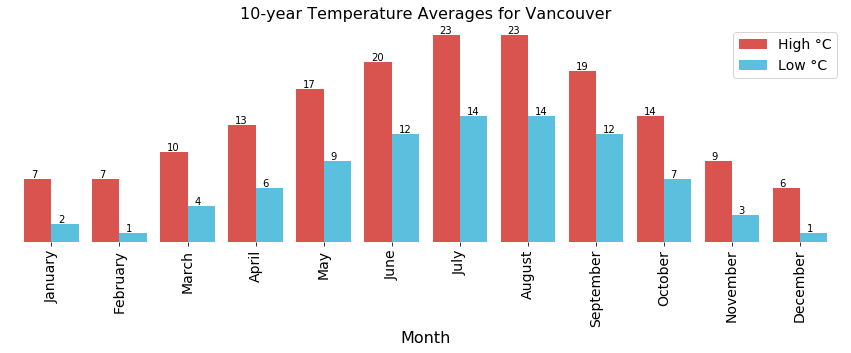

In [47]:
colors_list = ['#d9534f','#5bc0de']

# Change this line to plot percentages instead of absolute values
ax = vantempdf.plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=vantempdf.columns,fontsize= 14)
plt.title("10-year Temperature Averages for Vancouver",fontsize= 16)
plt.xlabel('Month', fontsize=16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:}'.format(height), (x+0.1, y + height + 0.2))

Based on the data shown here, it appears that Vancouver is suitable for outdoor activity from **April** to **October**

## Edmonton Temperature <a name="edmonton_temperature"></a>

Now lets do the same for Edmonton and see if there is any difference

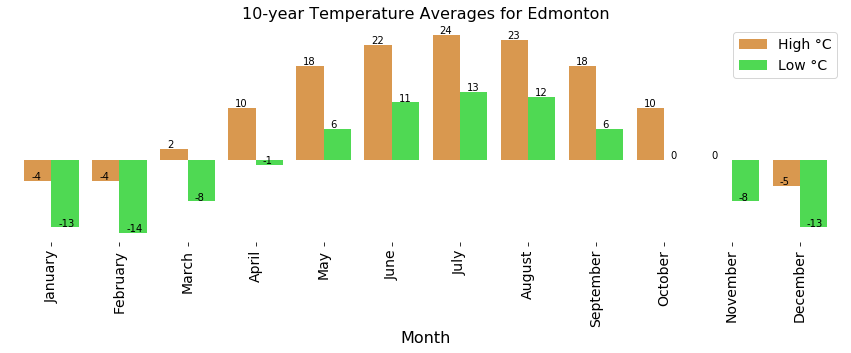

In [52]:
url2 = 'https://www.currentresults.com/Weather/Canada/Alberta/Places/edmonton-temperatures-by-month-average.php'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url2, headers=header)

edtempdfs = pd.read_html(r.text)
edtempdf = edtempdfs[0]
edtempdf.drop(columns = ['High °F','Low °F'], axis=1, inplace=True)
edtempdf.rename(columns={"Unnamed: 2": "Month"}, inplace=True)
edtempdf = edtempdf[0:12]
edtempdf.set_index('Month', inplace = True)

colors_list = ['#d9984f','#4fd953']

# Change this line to plot percentages instead of absolute values
ax1 = edtempdf.plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=edtempdf.columns,fontsize= 14)
plt.title("10-year Temperature Averages for Edmonton",fontsize= 16)
plt.xlabel('Month', fontsize=16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate('{:}'.format(height), (x+0.1, y + height + 0.2))

Based on the data shown here, it appears that Edmonton is suitable for outdoor activity from **May** to **September**

# Conclusion <a name="conclusion"></a>

For Vancouver, the clustered neighborhoods has the following features:  
**Cluster 0** features bus tops, coffee shops and Asian restaurants. The neighborhoods in cluster 0 are concentrated in the south and south east Vancouver.  
**Cluster 1** features park and yoga studios. Only two neighborhoods are in this cluster and both are located at west part of Vancouver.  
**Cluster 2** has largest number of neighborhoods most various kinds of venues. The most common venues are restaurants, parks, hotels and food trucks. These neighborhoods are mainly located at the center of the city especially around downtown.  
**Cluster 3** has only one neighborhood in it. It features various kinds of restaurants.

For Edmonton, the clustered neighborhoods has the following features:  
**Cluster 0** features various kinds of stores such as convenience Store, construction & landscaping services and discount store. All neighborhoods in cluster 0 are scattered at peripheral area of the city.  
**Cluster 1** has largest number of neighborhoods most various kinds of venues. The most common venues are restaurants, cafe, bars and shops. These neighborhoods are mainly located at the center of the city.    
**Cluster 2** has only one neighborhood in it. It features parks and shops. It is located at east part of the city.   
**Cluster 3** has only one neighborhood in it. It features various kinds of stores. It is located at northeast of the city and far from the city center.

As for temperature, based on the data shown above, it appears that for Vancouver, the best time for outdoor activity is from **April** to **October** and for Edmonton, the best time is from **May** to **September**. In general, compared with Edmonton, Vancouver has nicer weather all year around without much time below zero.

**In conclusion, the best choice for operating a seasonal food truck service is from April to October in the neighborhoods in cluster 2 in Vancouver.** However, as there has already been some other food truck services in those neighborhoods, further analysis is required to optimize the strategy and to avoid direct competition.